
# Orientation-Triage Sequence Analysis

In [1]:

%pprint
import sys
sys.path.insert(1, '../py')

Pretty printing has been turned OFF


In [2]:

from notebook_utils import NotebookUtilities
import copy
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re

nu = NotebookUtilities(data_folder_path=os.path.abspath('../data'))

In [3]:

# Get all CSVs into one data frame
if nu.pickle_exists('frvrs_logs_df'):
    frvrs_logs_df = nu.load_object('frvrs_logs_df')
    print(frvrs_logs_df.shape)
    # df = frvrs_logs_df.sample(4).dropna(axis='columns', how='all')
    # display(df.T)

(842663, 113)



## Do files switch back and forth between the orientation and normal training?

In [4]:

# Visualize the scene type sequence in each file by looping through
# each unique file and scene combination and recording the sequence
time_groups_dict = {}
for file_name, file_df in frvrs_logs_df.groupby('file_name'):
    key = file_name
    actions_list = []
    for scene_index, scene_df in file_df.sort_values('scene_index').groupby('scene_index'):
        scene_type = scene_df.scene_type.unique().item()
        actions_list.append(scene_type)
    time_groups_dict[key] = actions_list
color_dict = {'Orientation': '#1f77b4', 'Triage': '#ff7f0e'}

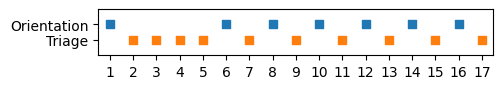

In [5]:

# Plot the time groups sequence with the greatest length
sequence = sorted(time_groups_dict.values(), key=lambda x: len(x), reverse=True)[0]
fig = nu.plot_sequence(sequence, color_dict=color_dict, verbose=False)

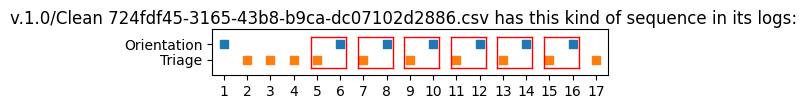

In [6]:

# Get the sequence with the highest number of ngrams
highlighted_ngrams = ['Triage', 'Orientation']
sequence = sorted(time_groups_dict.values(), key=lambda actions_list: nu.count_ngrams(actions_list, highlighted_ngrams), reverse=True)[0]
for k, v in time_groups_dict.items():
    if v == sequence: fig = nu.plot_sequence(
        sequence, highlighted_ngrams=highlighted_ngrams, suptitle=f'{k} has this kind of sequence in its logs:', color_dict=color_dict, verbose=False
    )

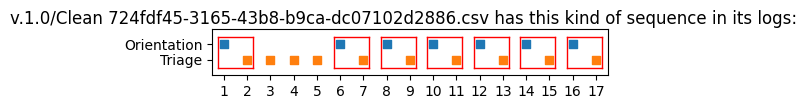

In [7]:

# Get the sequence with the highest number of ngrams
highlighted_ngrams = ['Orientation', 'Triage']
sequence = sorted(time_groups_dict.values(), key=lambda actions_list: nu.count_ngrams(actions_list, highlighted_ngrams), reverse=True)[0]
for k, v in time_groups_dict.items():
    if v == sequence: fig = nu.plot_sequence(
        sequence, highlighted_ngrams=highlighted_ngrams, suptitle=f'{k} has this kind of sequence in its logs:', color_dict=color_dict, verbose=False
    )

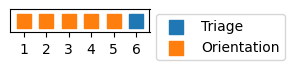

In [8]:

# Get 1 sequences from the time groups dictionary
sequences = nu.get_sequences_by_count(time_groups_dict, count=1)

# Plot the time group sequences side-by-side
nu.plot_sequences(sequences);

In [9]:

triage_count_df = pd.DataFrame([{'file_name': k, 'triage_count': v.count('Triage')} for k, v in time_groups_dict.items()])

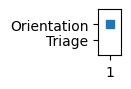

In [12]:

# Visualize the files with zero scenes
mask_series = (triage_count_df.triage_count == 0)
file_names_list = triage_count_df[mask_series].file_name.tolist()

# O(n), where n is the number of elements in the time groups dictionary
sequences_set = set([str(v) for k, v in time_groups_dict.items() if k in file_names_list])

highlighted_ngrams = ['Triage', 'Orientation']

# O(n log n), where n is the number of elements in the sequences set
for sequence in sorted([eval(s) for s in sequences_set]): fig = nu.plot_sequence(
    sequence, highlighted_ngrams=highlighted_ngrams, suptitle=None, color_dict=color_dict, verbose=False
)

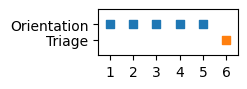

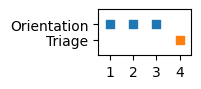

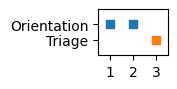

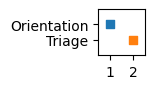

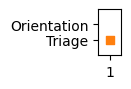

In [10]:

# Visualize the files with one scene
mask_series = (triage_count_df.triage_count == 1)
file_names_list = triage_count_df[mask_series].file_name.tolist()

# O(n), where n is the number of elements in the time groups dictionary
sequences_set = set([str(v) for k, v in time_groups_dict.items() if k in file_names_list])

highlighted_ngrams = ['Triage', 'Orientation']

# O(n log n), where n is the number of elements in the sequences set
for sequence in sorted([eval(s) for s in sequences_set]): fig = nu.plot_sequence(
    sequence, highlighted_ngrams=highlighted_ngrams, suptitle=None, color_dict=color_dict, verbose=False
)

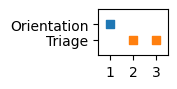

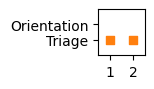

In [11]:

# Visualize the files with two scenes
triage_count_df = pd.DataFrame([{'file_name': k, 'triage_count': v.count('Triage')} for k, v in time_groups_dict.items()])
mask_series = (triage_count_df.triage_count == 2)
file_names_list = triage_count_df[mask_series].file_name.tolist()

# O(n), where n is the number of elements in the time groups dictionary
sequences_set = set([str(v) for k, v in time_groups_dict.items() if k in file_names_list])

highlighted_ngrams = ['Triage', 'Orientation']

# O(n log n), where n is the number of elements in the sequences set
for sequence in sorted([eval(s) for s in sequences_set]): fig = nu.plot_sequence(
    sequence, highlighted_ngrams=highlighted_ngrams, suptitle=None, color_dict=color_dict, verbose=False
)